# Linear Regression Part 3

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)['Adj Close']

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


Date
2014-01-02    3.95
2014-01-03    4.00
2014-01-06    4.13
2014-01-07    4.18
2014-01-08    4.18
Name: Adj Close, dtype: float64

In [3]:
dataset = pd.concat([dataset, dataset.shift(), dataset.shift(2),dataset.shift(3),dataset.shift(4),dataset.shift(5), dataset.shift(6),dataset.shift(7),dataset.shift(8),dataset.shift(9),dataset.shift(10)], axis=1).dropna() 
dataset.columns = list(range(0,11))
dataset.rename(columns={0:'actual_stock_price'},inplace=True)
dataset.head()

,actual_stock_price,1,2,3,4,5,6,7,8,9,10
Date,,,,,,,,,,,
2014-01-16,4.38,4.47,4.30,4.13,4.17,4.09,4.18,4.18,4.13,4.00,3.95
2014-01-17,4.18,4.38,4.47,4.30,4.13,4.17,4.09,4.18,4.18,4.13,4.00
2014-01-21,4.17,4.18,4.38,4.47,4.30,4.13,4.17,4.09,4.18,4.18,4.13
2014-01-22,3.67,4.17,4.18,4.38,4.47,4.30,4.13,4.17,4.09,4.18,4.18
2014-01-23,3.62,3.67,4.17,4.18,4.38,4.47,4.30,4.13,4.17,4.09,4.18


In [4]:
# Split the data into training and test data sets. 
train = dataset.head(len(dataset)-10)
test = dataset.tail(10)

In [5]:
# Import the Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression

# Create the model object.
model = LinearRegression()

# Train the model on the training data.
model.fit(train[list(range(1,11))],train['actual_stock_price'])

# Make predictions on the test data.
test['predictions'] = model.predict(test[list(range(1,11))])

<Figure size 864x504 with 0 Axes>

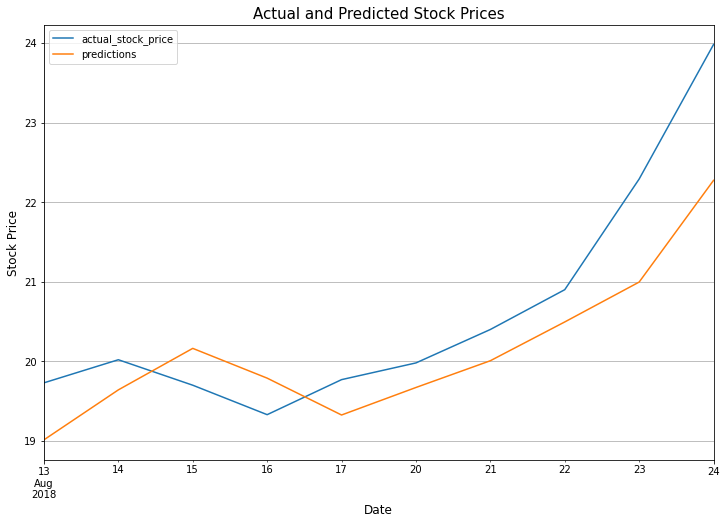

In [6]:
# Visualize the actual stock price and the predicted stock price over the time period.
plt.figure(figsize=(12,7))
ax = test[['actual_stock_price','predictions']].plot(figsize=(12,8))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.title('Actual and Predicted Stock Prices', fontsize=15)
plt.grid()
plt.show()